In [1]:
%cd ..

/home/feodor/Jupyter/topological-illustrations


/home/feodor/Jupyter/jupyter-env/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt

# Load the data

In [3]:
input_path = 'geodata/gebco_2024_n4.0_s-11.0_w118.0_e137.0_ascii.asc'
output_path = "geodata/banda_sea_heights.csv"

# Load ASCII file (modify according to structure)
data = np.loadtxt(input_path, skiprows=6)  # Skip metadata lines

# Convert to DataFrame and save
df = pd.DataFrame(data)
df.to_csv(output_path, index=False)

print(f'df.shape = {df.shape}')

df.shape = (3600, 4560)


In [4]:
heights = df.values

print(f'heights.shape = {heights.shape}')
print(f'heights.min = {heights.min()}')
print(f'heights.max = {heights.max()}')
print(f'heights.mean = {heights.mean()}')

heights.shape = (3600, 4560)
heights.min = -7601.0
heights.max = 4239.0
heights.mean = -1773.7913320540936


# Given Height Data Analysis

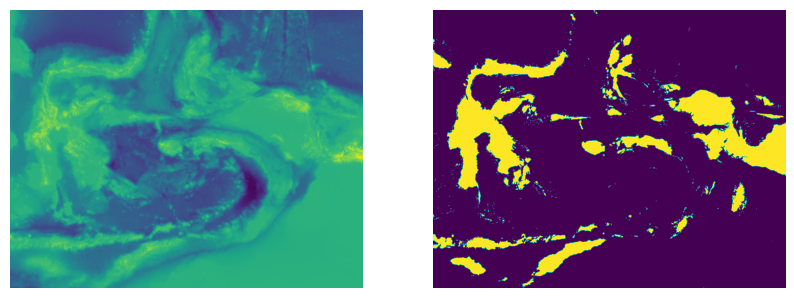

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].imshow(heights)
axs[1].imshow(heights >= 0)

axs[0].axis('off')
axs[1].axis('off')

plt.show()

## Height Distribution

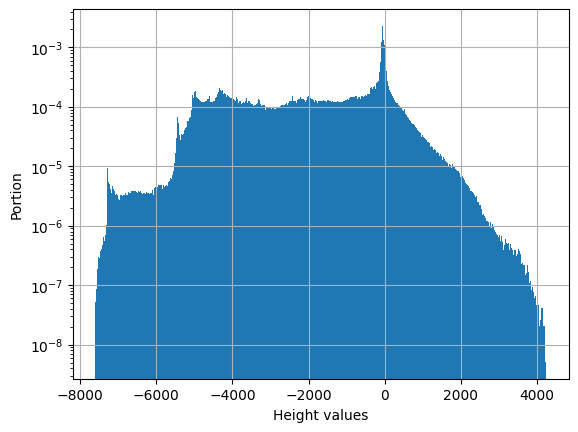

In [6]:
plt.hist(heights.reshape(-1), bins=np.linspace(heights.min(), heights.max(), 1000), density=True, log=True)

plt.xlabel('Height values')
plt.ylabel('Portion')
plt.grid(True)
plt.show()

## Extremums

In [7]:
def get_local_maximums(arr, framed=False):
    # finds the indices of local maxima in a 2D array.
    arr = np.asarray(arr)
    if not isinstance(arr, np.ndarray) or arr.ndim != 2:
        raise ValueError("Input must be a 2D NumPy array")
    
    if not framed:
        new_arr = -np.inf*np.ones(np.array(arr.shape, dtype=int) + 2)
        new_arr[1: -1, 1:-1] = arr
        return get_local_maximums(new_arr, framed=True)

    cond0 = arr[:-2, :-2] < arr[1:-1, 1:-1]
    cond1 = arr[:-2, 1:-1] < arr[1:-1, 1:-1]
    cond2 = arr[:-2, 2:] < arr[1:-1, 1:-1]
    cond3 = arr[1:-1, :-2] < arr[1:-1, 1:-1]
    cond4 = arr[1:-1, 2:] < arr[1:-1, 1:-1]
    cond5 = arr[2:, :-2] < arr[1:-1, 1:-1]
    cond6 = arr[2:, 1:-1] < arr[1:-1, 1:-1]
    cond7 = arr[2:, 2:] < arr[1:-1, 1:-1]

    return np.where(cond0 & cond1 & cond2 & cond3 & cond4 & cond5 & cond6 & cond7)

In [8]:
def get_local_minimums(arr, framed=False):
    # finds the indices of local minima in a 2D array
    arr = np.asarray(arr)
    if not isinstance(arr, np.ndarray) or arr.ndim != 2:
        raise ValueError("Input must be a 2D NumPy array")
    
    if not framed:
        new_arr = +np.inf*np.ones(np.array(arr.shape, dtype=int) + 2)
        new_arr[1: -1, 1:-1] = arr
        return get_local_minimums(new_arr, framed=True)

    cond0 = arr[:-2, :-2] > arr[1:-1, 1:-1]
    cond1 = arr[:-2, 1:-1] > arr[1:-1, 1:-1]
    cond2 = arr[:-2, 2:] > arr[1:-1, 1:-1]
    cond3 = arr[1:-1, :-2] > arr[1:-1, 1:-1]
    cond4 = arr[1:-1, 2:] > arr[1:-1, 1:-1]
    cond5 = arr[2:, :-2] > arr[1:-1, 1:-1]
    cond6 = arr[2:, 1:-1] > arr[1:-1, 1:-1]
    cond7 = arr[2:, 2:] > arr[1:-1, 1:-1]

    return np.where(cond0 & cond1 & cond2 & cond3 & cond4 & cond5 & cond6 & cond7)

In [9]:
def get_saddles(arr, framed=False):
    # finds the indices of saddles in a 2D array
    arr = np.asarray(arr)
    if not isinstance(arr, np.ndarray) or arr.ndim != 2:
        raise ValueError("Input must be a 2D NumPy array")
        
    if not framed:
        new_arr = np.nan*np.ones(np.array(arr.shape, dtype=int) + 2)
        new_arr[1: -1, 1:-1] = arr
        return get_saddles(new_arr, framed=True) 
        
    # Conditions for a saddle point:
    diag1_min = (arr[:-2, :-2] > arr[1:-1, 1:-1]) & (arr[2:, 2:] > arr[1:-1, 1:-1])
    diag1_max = (arr[:-2, :-2] < arr[1:-1, 1:-1]) & (arr[2:, 2:] < arr[1:-1, 1:-1])
    diag2_min = (arr[:-2, 2:] > arr[1:-1, 1:-1]) & (arr[2:, :-2] > arr[1:-1, 1:-1])
    diag2_max = (arr[:-2, 2:] < arr[1:-1, 1:-1]) & (arr[2:, :-2] < arr[1:-1, 1:-1])
    
    saddle_points = (diag1_min & diag2_max) | (diag1_max & diag2_min)
    
    return np.where(saddle_points)

In [10]:
local_maximums = get_local_maximums(heights)
local_minimums = get_local_minimums(heights)
saddles = get_saddles(heights)

print(f'Number of local maximums: {len(local_maximums[0])}')
print(f'Number of local minimums: {len(local_minimums[0])}')
print(f'Number of saddles: {len(saddles[0])}')

Number of local maximums: 82882
Number of local minimums: 66470
Number of saddles: 63335


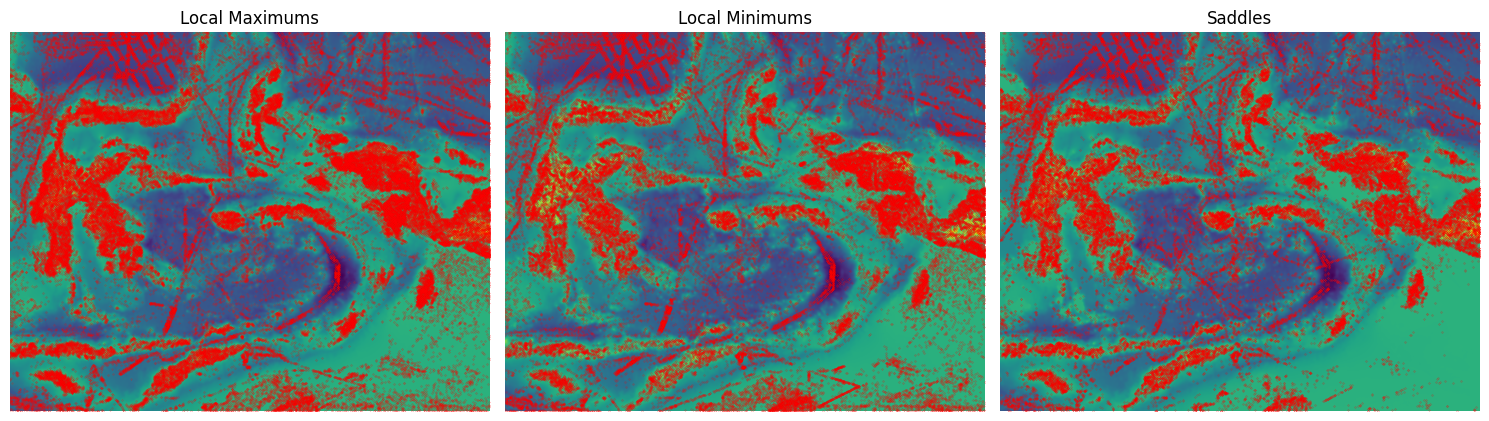

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

for i in range(3):
    axs[i].imshow(heights, cmap='viridis')
    axs[i].axis('off')

axs[0].set_title('Local Maximums')
axs[0].scatter(local_maximums[1], local_maximums[0], color='red', marker='.', s=0.1)

axs[1].set_title('Local Minimums')
axs[1].scatter(local_minimums[1], local_minimums[0], color='red', marker='.', s=0.1)

axs[2].set_title('Saddles')
axs[2].scatter(saddles[1], saddles[0], color='red', marker='.', s=0.1)

plt.tight_layout()
plt.show()

# Simplify

## Decrease Resolution

In [12]:
heights_decreased = sp.ndimage.zoom(heights, 0.1)
heights_decreased.shape

(360, 456)

In [13]:
local_maximums = get_local_maximums(heights_decreased)
local_minimums = get_local_minimums(heights_decreased)
saddles = get_saddles(heights_decreased)

print(f'Number of local maximums: {len(local_maximums[0])}')
print(f'Number of local minimums: {len(local_minimums[0])}')
print(f'Number of saddles: {len(saddles[0])}')

Number of local maximums: 4963
Number of local minimums: 4359
Number of saddles: 3635


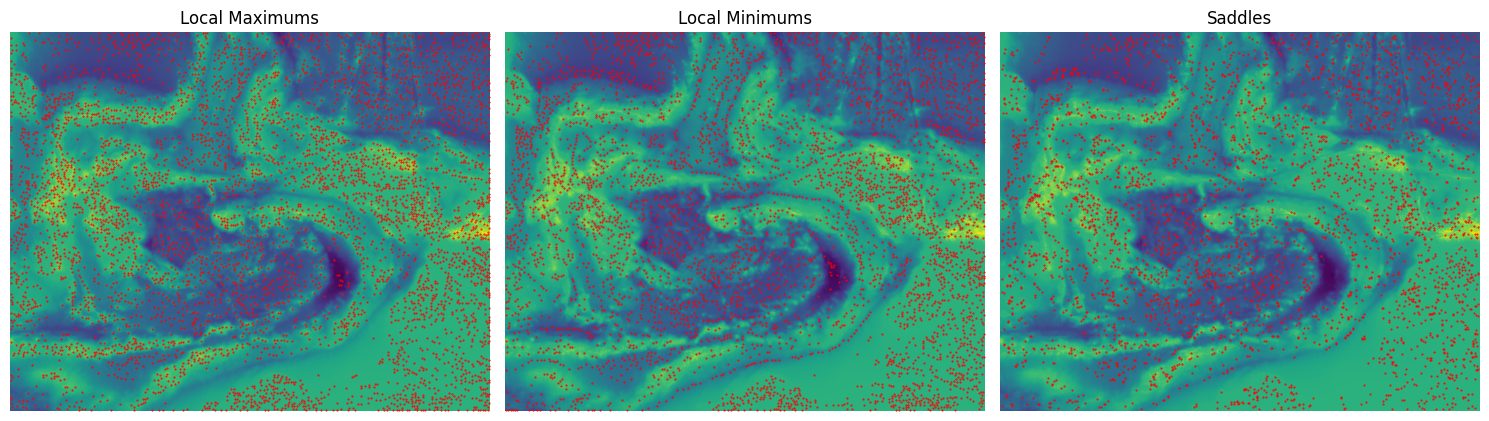

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

for i in range(3):
    axs[i].imshow(heights_decreased, cmap='viridis')
    axs[i].axis('off')

axs[0].set_title('Local Maximums')
axs[0].scatter(local_maximums[1], local_maximums[0], color='red', marker='.', s=1)

axs[1].set_title('Local Minimums')
axs[1].scatter(local_minimums[1], local_minimums[0], color='red', marker='.', s=1)

axs[2].set_title('Saddles')
axs[2].scatter(saddles[1], saddles[0], color='red', marker='.', s=1)

plt.tight_layout()
plt.show()